In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import pylab as pl
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


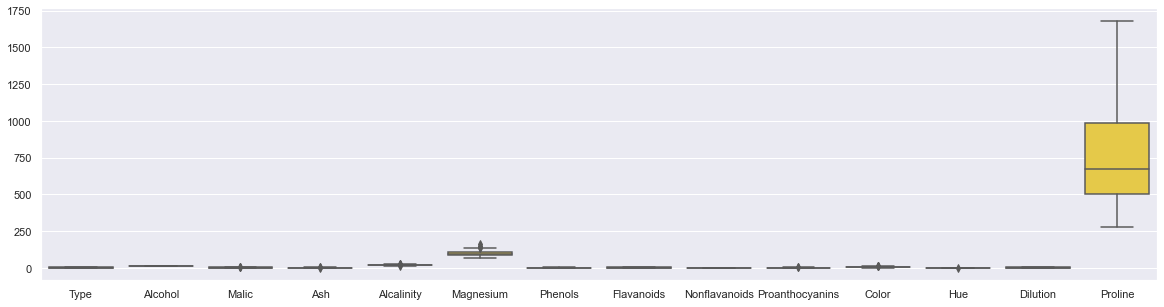

In [4]:
sns.set(rc = {'figure.figsize':(20,5)})
sns.boxplot(data = df, orient = "v", palette = "Set2");

# Feature Scaling

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:,1:])
scaled_data[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [6]:
array = df.iloc[:,1:]  #first column is type which is already categorised and not useful for unsupervised clustering

norm_scaler = MinMaxScaler(feature_range = (0,1))
normscaled = norm_scaler.fit_transform(array)

#transformed data
set_printoptions(precision =2)
print(normscaled[:5])

[[0.84 0.19 0.57 0.26 0.62 0.63 0.57 0.28 0.59 0.37 0.46 0.97 0.56]
 [0.57 0.21 0.42 0.03 0.33 0.58 0.51 0.25 0.27 0.26 0.46 0.78 0.55]
 [0.56 0.32 0.7  0.41 0.34 0.63 0.61 0.32 0.76 0.38 0.45 0.7  0.65]
 [0.88 0.24 0.61 0.32 0.47 0.99 0.66 0.21 0.56 0.56 0.31 0.8  0.86]
 [0.58 0.37 0.81 0.54 0.52 0.63 0.5  0.49 0.44 0.26 0.46 0.61 0.33]]


# PCA

In [7]:
pca_arr = PCA(n_components = 3)
pca_std_arr = pca_arr.fit_transform(scaled_data)
pca_std_arr[:5]

array([[ 3.32, -1.44, -0.17],
       [ 2.21,  0.33, -2.03],
       [ 2.52, -1.03,  0.98],
       [ 3.76, -2.76, -0.18],
       [ 1.01, -0.87,  2.03]])

In [8]:
var1 = pca_arr.explained_variance_ratio_
var1

array([0.36, 0.19, 0.11])

In [9]:
var2 = np.cumsum(np.round(var1,decimals = 4) * 100)
var2

array([36.2 , 55.41, 66.53])

In [10]:
pca_std_df = pd.DataFrame(pca_std_arr)
pca_std_df.head()

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [11]:
pca_norm_arr = pca_arr.fit_transform(normscaled)
pca_norm_arr[:5]

array([[-0.71, -0.25,  0.02],
       [-0.48, -0.01, -0.28],
       [-0.52, -0.19,  0.2 ],
       [-0.82, -0.58,  0.08],
       [-0.2 , -0.06,  0.3 ]])

In [12]:
var1 = pca_arr.explained_variance_ratio_
var1

array([0.41, 0.19, 0.09])

In [13]:
var2 = np.cumsum(np.round(var1,decimals = 4)*100)
var2

array([40.75, 59.72, 68.28])

In [14]:
pca_norm_df = pd.DataFrame(pca_norm_arr)
pca_norm_df.head()

,0,1,2
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


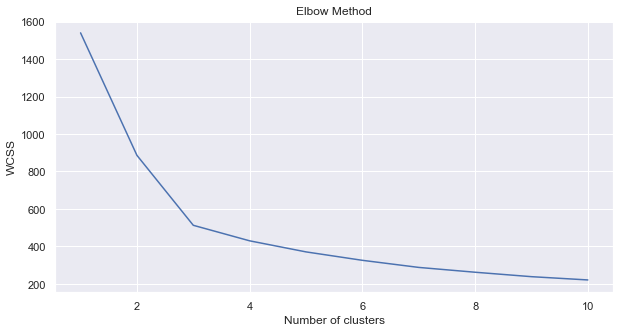

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(pca_std_df)
    wcss.append(kmeans.inertia_)

sns.set(rc = {'figure.figsize':(10,5)}) 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
clusters_kmeans_pca = KMeans(3, random_state = 50)
clusters_kmeans_pca.fit(pca_std_df)
clusters_kmeans_pca.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [17]:
data_kmeans_pca = pca_std_df.copy()
data_kmeans_pca['clusters_kmeans'] = clusters_kmeans_pca.labels_
clusters_kmeans_pca.cluster_centers_

array([[-2.72e+00, -1.13e+00, -2.39e-01],
       [ 2.28e+00, -8.95e-01, -2.15e-03],
       [-7.27e-02,  1.78e+00,  1.93e-01]])

In [18]:
data_kmeans_pca.groupby('clusters_kmeans').agg(['mean'])

,0,1,2
,mean,mean,mean
clusters_kmeans,,,
0,-2.720036,-1.125651,-0.239093
1,2.275808,-0.894518,-0.002150
2,-0.072720,1.777544,0.192644


In [19]:
data_kmeans_pca.head()

,0,1,2,clusters_kmeans
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


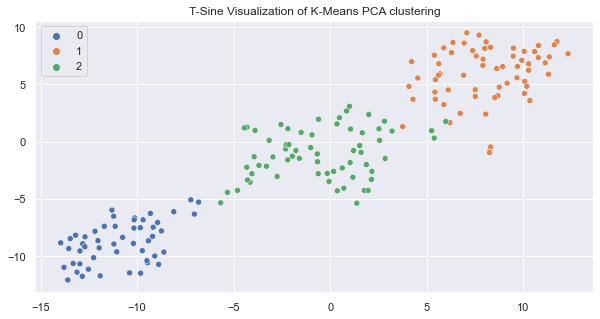

In [20]:
data_tsne_pca_kmeans = TSNE(n_components = 2).fit_transform(data_kmeans_pca.iloc[:,:-1])
sns.scatterplot(data_tsne_pca_kmeans[:,0],data_tsne_pca_kmeans[:,1],hue = clusters_kmeans_pca.labels_, palette = "deep").set_title('T-Sine Visualization of K-Means PCA clustering');

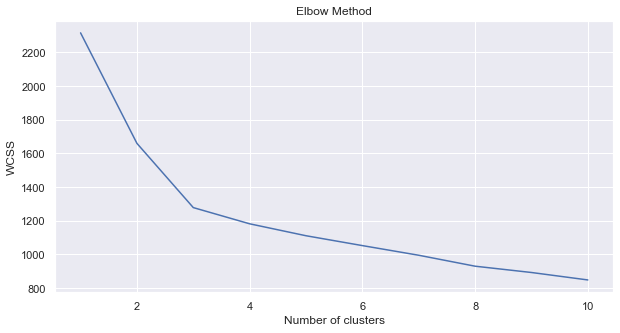

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

sns.set(rc = {'figure.figsize':(10,5)}) 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
clusters_kmeans = KMeans(3, random_state=50)
clusters_kmeans.fit(scaled_data)
clusters_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [23]:
data_kmeans = df.iloc[:,1:].copy()
data_kmeans['clusters_kmeans'] = clusters_kmeans.labels_
clusters_kmeans.cluster_centers_

array([[ 0.84, -0.3 ,  0.36, -0.61,  0.58,  0.89,  0.98, -0.56,  0.58,
         0.17,  0.47,  0.78,  1.13],
       [ 0.16,  0.87,  0.19,  0.52, -0.08, -0.98, -1.22,  0.73, -0.78,
         0.94, -1.16, -1.29, -0.41],
       [-0.93, -0.39, -0.49,  0.17, -0.49, -0.08,  0.02, -0.03,  0.06,
        -0.9 ,  0.46,  0.27, -0.75]])

In [24]:
data_kmeans.groupby('clusters_kmeans').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_kmeans,,,,,,,,,,,,,
0,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [25]:
pca = PCA(n_components = 2).fit(scaled_data)
pca_2d = pca.transform(scaled_data)

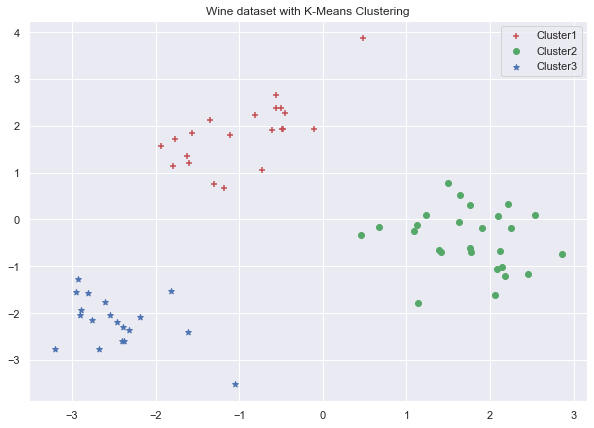

In [26]:
sns.set(rc = {'figure.figsize':(10,7)})

for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c = 'r', marker = '+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c = 'g', marker = 'o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c = 'b', marker = '*')
    
        
pl.legend([c1, c2, c3], ['Cluster1', 'Cluster2','Cluster3'])
pl.title('Wine dataset with K-Means Clustering')
pl.show()

In [27]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
agglo_pca = hc.fit_predict(pca_norm_df)
data_agglo_pca = pca_norm_df.copy()
data_agglo_pca['clusters_agglo'] = agglo_pca
data_agglo_pca.head()

,0,1,2,clusters_agglo
0,-0.706336,-0.253193,0.024093,1
1,-0.484977,-0.008823,-0.280482,1
2,-0.521172,-0.189187,0.196217,1
3,-0.821644,-0.580906,0.081110,1
4,-0.202546,-0.059467,0.300240,1


In [28]:
data_agglo_pca.groupby('clusters_agglo').agg(['mean'])

,0,1,2
,mean,mean,mean
clusters_agglo,,,
0,0.273576,0.091682,-0.039456
1,-0.485404,-0.198350,-0.000034
2,0.091377,0.276421,0.469319


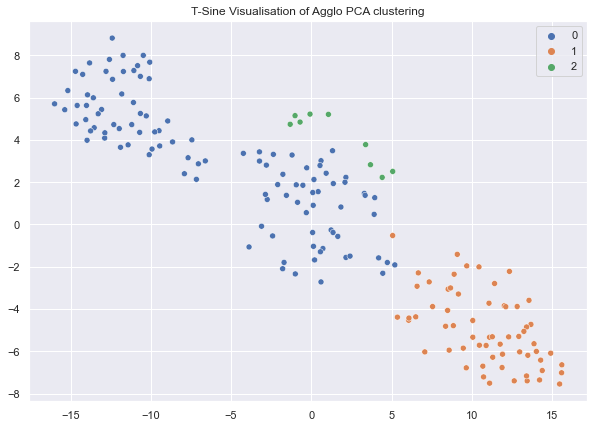

In [29]:
data_tsne_pca_agglo = TSNE(n_components=2).fit_transform(data_agglo_pca.iloc[:,:-1])
sns.scatterplot(data_tsne_pca_agglo[:,0],data_tsne_pca_agglo[:,1], hue=agglo_pca, palette="deep").set_title('T-Sine Visualisation of Agglo PCA clustering');

In [30]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(normscaled)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [31]:
data_agglo = df.iloc[:,1:].copy()
data_agglo['clusters_agglo'] = y_hc
data_agglo.groupby('clusters_agglo').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_agglo,,,,,,,,,,,,,
0,12.280822,1.916301,2.227534,19.923288,94.739726,2.170274,1.926712,0.363562,1.570274,3.268082,1.025425,2.647671,526.616438
1,13.699194,1.997742,2.473871,17.559677,106.741935,2.854839,3.012742,0.290323,1.899355,5.466129,1.068710,3.171935,1091.725806
2,13.215349,3.537674,2.447674,21.558140,98.139535,1.700000,0.785349,0.462093,1.181163,7.508605,0.681628,1.742791,623.651163


In [32]:
pca_agg = PCA(n_components = 2).fit(normscaled)
pca_2d_agg = pca_agg.transform(normscaled)

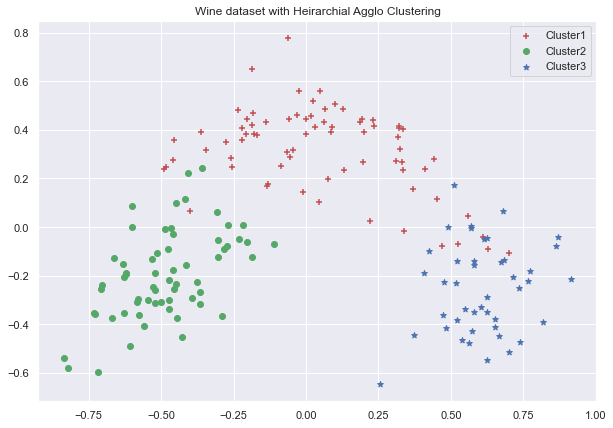

In [33]:
sns.set(rc = {'figure.figsize':(10,7)})

for i in range(0, pca_2d_agg.shape[0]):
    if y_hc[i] == 0:
        c1 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1], c = 'r', marker = '+')
    elif y_hc[i] == 1:
        c2 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1], c = 'g', marker = 'o')
    elif y_hc[i] == 2:
        c3 = pl.scatter(pca_2d_agg[i,0],pca_2d_agg[i,1], c = 'b', marker = '*')  
        
pl.legend([c1, c2, c3], ['Cluster1', 'Cluster2', 'Cluster3'])
pl.title('Wine dataset with Heirarchial Agglo Clustering')
pl.show()